In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/keras-pretrained-models/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels.h5
/kaggle/input/keras-pretrained-models/resnet50_weights_tf_dim_ordering_tf_kernels.h5
/kaggle/input/keras-pretrained-models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/keras-pretrained-models/xception_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/keras-pretrained-models/imagenet_class_index.json
/kaggle/input/keras-pretrained-models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/keras-pretrained-models/Kuszma.JPG
/kaggle/input/keras-pretrained-models/xception_weights_tf_dim_ordering_tf_kernels.h5
/kaggle/input/keras-pretrained-models/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5
/kaggle/input/bciaut-p300/data/SBJ01/S05/Test/testTargets.txt
/ka

In [2]:
!pip install mne

In [53]:
import scipy.io


mat_contents = scipy.io.loadmat('/kaggle/input/bciaut-p300/data/SBJ01/S01/Train/trainData.mat')

print(scipy.io.whosmat('/kaggle/input/bciaut-p300/data/SBJ01/S01/Train/trainData.mat'))


[('trainData', (8, 350, 1600), 'double')]


In [54]:
from sklearn.preprocessing import StandardScaler


data = scipy.io.loadmat('/kaggle/input/bciaut-p300/data/SBJ01/S01/Train/trainData.mat')


X = data['trainData']  


X_2d = X.reshape(-1, X.shape[-1])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_2d)


X_scaled_3d = X_scaled.reshape(X.shape[0], X.shape[1], X.shape[2])


scipy.io.savemat('preprocessed_data.mat', {'X': X_scaled_3d})


Model: "sequential_120"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_259 (Conv1D)         (None, 346, 128)          1024128   
                                                                 
 max_pooling1d_259 (MaxPooli  (None, 173, 128)         0         
 ng1D)                                                           
                                                                 
 batch_normalization_234 (Ba  (None, 173, 128)         512       
 tchNormalization)                                               
                                                                 
 conv1d_260 (Conv1D)         (None, 171, 128)          49280     
                                                                 
 max_pooling1d_260 (MaxPooli  (None, 85, 128)          0         
 ng1D)                                                           
                                                    

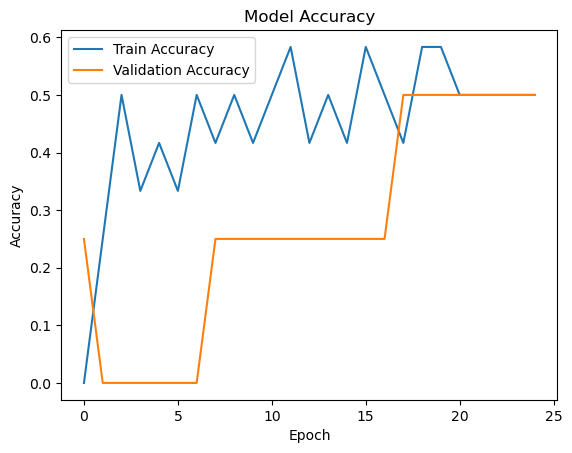

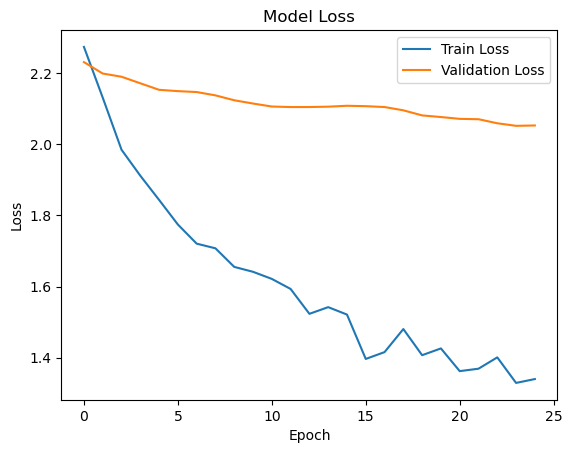

In [146]:
import numpy as np
import scipy.io as sio 
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense, Flatten, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load data and labels
subj = '01'
session = '01'
train_data = sio.loadmat(f'/kaggle/input/bciaut-p300/data/SBJ{subj}/S{session}/Train/trainData.mat')['trainData']
train_labels = np.loadtxt(f'/kaggle/input/bciaut-p300/data/SBJ{subj}/S{session}/Train/trainLabels.txt')
test_data = sio.loadmat(f'/kaggle/input/bciaut-p300/data/SBJ01/S01/Test/testData.mat')['testData']
test_labels = np.loadtxt(f'/kaggle/input/bciaut-p300/data/SBJ01/S01/Test/testLabels.txt')

# Increase the size of train_data to 16
train_data = np.concatenate([train_data] * 2, axis=0)

# Shuffle the training data and labels together
indices = np.arange(train_data.shape[0])
np.random.shuffle(indices)
train_data = train_data[indices]
train_labels = train_labels[indices]

# Train-test split
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Convert labels to categorical
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels, num_classes=9)  

# Define CNN-BLSTM model
model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(train_data.shape[1], train_data.shape[2])),
    MaxPooling1D(2),
    BatchNormalization(),
    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    BatchNormalization(),
    LSTM(64, return_sequences=True),
    Dropout(0.1),
    LSTM(64),
    Dropout(0.1),
    Dense(9, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(train_data, train_labels, epochs=25, batch_size=32, validation_data=(val_data, val_labels))

# # Evaluate the model on test data
# test_loss, test_accuracy = model.evaluate(test_data, to_categorical(test_labels, num_classes=9))
# print("Test Loss:", test_loss)
# print("Test Accuracy:", test_accuracy)

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()



In [106]:
train_labels.shape

(12, 9)

In [107]:
val_labels.shape

(4, 9)

Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_186 (Conv1D)         (None, 341, 64)           1024064   
                                                                 
 max_pooling1d_186 (MaxPooli  (None, 113, 64)          0         
 ng1D)                                                           
                                                                 
 conv1d_187 (Conv1D)         (None, 109, 128)          41088     
                                                                 
 max_pooling1d_187 (MaxPooli  (None, 36, 128)          0         
 ng1D)                                                           
                                                                 
 conv1d_188 (Conv1D)         (None, 34, 256)           98560     
                                                                 
 max_pooling1d_188 (MaxPooli  (None, 11, 256)        

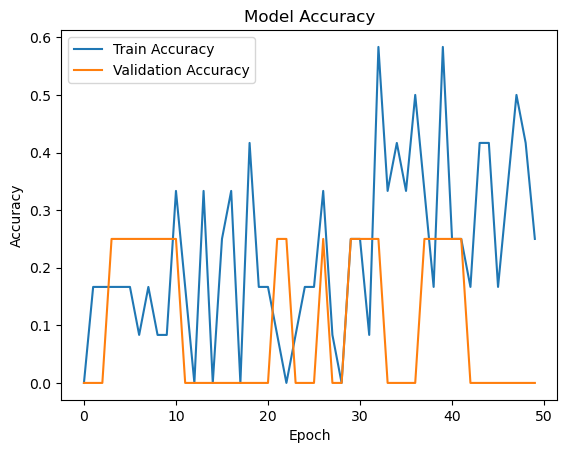

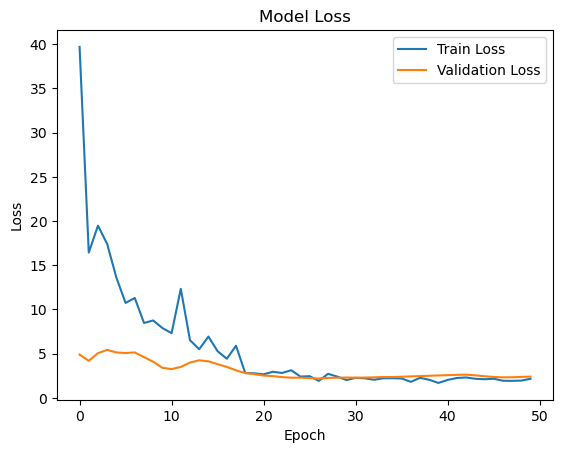

In [108]:
#CNN Model
import numpy as np
import scipy.io as sio
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Subject and Session IDs
subj = '01'
session = '01'

# Load test data and labels
test_data = sio.loadmat(f'/kaggle/input/bciaut-p300/data/SBJ01/S01/Test/testData.mat')['testData']
test_labels = np.loadtxt(f'/kaggle/input/bciaut-p300/data/SBJ{subj}/S{session}/Test/testLabels.txt')

# Load train data and labels
train_data = sio.loadmat(f'/kaggle/input/bciaut-p300/data/SBJ{subj}/S{session}/Train/trainData.mat')['trainData']
train_labels = np.loadtxt(f'/kaggle/input/bciaut-p300/data/SBJ{subj}/S{session}/Train/trainLabels.txt')

# Increase the size of train_data to 16
train_data = np.concatenate([train_data] * 2, axis=0)

# Train-test split for labels
train_labels, val_labels = train_test_split(train_labels, test_size=0.2, random_state=42)

# Split data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Convert labels to categorical
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

# Define CNN model
def cnn_model():
    model = Sequential()
    model.add(Conv1D(64, 10, activation='relu', input_shape=(train_data.shape[1], train_data.shape[2])))
    model.add(MaxPooling1D(3))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPooling1D(3))
    model.add(Conv1D(256, 3, activation='relu'))
    model.add(MaxPooling1D(3))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))  # Added another dense layer
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))  # Added another dense layer
    model.add(Dropout(0.5))
    model.add(Dense(9, activation='softmax'))  # Adjusted to match the number of classes
    return model

# Create and compile the model
model = cnn_model()
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Print model summary
model.summary()

# Define callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Train the model
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(val_data, val_labels))

# # Evaluate the model on test data
# test_loss, test_accuracy = model.evaluate(test_data, to_categorical(test_labels))
# print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()



In [109]:
#RNN Model
import numpy as np
import scipy.io as sio
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import LSTM, Dropout, Dense, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Subject and Session IDs
subj = '01'
session = '01'

# Load test data and labels
test_data = sio.loadmat(f'/kaggle/input/bciaut-p300/data/SBJ01/S01/Test/testData.mat')['testData']
test_labels = np.loadtxt(f'/kaggle/input/bciaut-p300/data/SBJ{subj}/S{session}/Test/testLabels.txt')

# Load train data and labels
train_data = sio.loadmat(f'/kaggle/input/bciaut-p300/data/SBJ{subj}/S{session}/Train/trainData.mat')['trainData']
train_labels = np.loadtxt(f'/kaggle/input/bciaut-p300/data/SBJ{subj}/S{session}/Train/trainLabels.txt')

# Increase the size of train_data to 16
train_data = np.concatenate([train_data] * 2, axis=0)

# Train-test split for labels
train_labels, val_labels = train_test_split(train_labels, test_size=0.2, random_state=42)

# Split data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Convert labels to categorical
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

# Define RNN model
def rnn_model():
    inputs = Input(shape=(train_data.shape[1], train_data.shape[2]))
    lstm1 = LSTM(64, return_sequences=True)(inputs)
    lstm2 = LSTM(64)(lstm1)
    drop1 = Dropout(0.5)(lstm2)
    dense1 = Dense(9, activation='softmax')(drop1)  # Adjusted to match the number of classes
    model = Model(inputs=inputs, outputs=dense1)
    return model

# Create and compile the model
model = rnn_model()
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(train_data, train_labels, epochs=20, batch_size=128, validation_data=(val_data, val_labels), callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 350, 1600)]       0         
                                                                 
 lstm_176 (LSTM)             (None, 350, 64)           426240    
                                                                 
 lstm_177 (LSTM)             (None, 64)                33024     
                                                                 
 dropout_190 (Dropout)       (None, 64)                0         
                                                                 
 dense_113 (Dense)           (None, 9)                 585       
                                                                 
Total params: 459,849
Trainable params: 459,849
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1/1 [==============================] - 4s

In [110]:
#LSTM Model
import numpy as np
import scipy.io as sio
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Subject and Session IDs
subj = '01'
session = '01'

# Load test data and labels
test_data = sio.loadmat(f'/kaggle/input/bciaut-p300/data/SBJ01/S01/Test/testData.mat')['testData']
test_labels = np.loadtxt(f'/kaggle/input/bciaut-p300/data/SBJ{subj}/S{session}/Test/testLabels.txt')

# Load train data and labels
train_data = sio.loadmat(f'/kaggle/input/bciaut-p300/data/SBJ{subj}/S{session}/Train/trainData.mat')['trainData']
train_labels = np.loadtxt(f'/kaggle/input/bciaut-p300/data/SBJ{subj}/S{session}/Train/trainLabels.txt')

# Increase the size of train_data to 16
train_data = np.concatenate([train_data] * 2, axis=0)

# Train-test split for labels
train_labels, val_labels = train_test_split(train_labels, test_size=0.2, random_state=42)

# Split data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Convert labels to categorical
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

# Define LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(train_data.shape[1], train_data.shape[2]), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))  # Adjusted to match the number of classes

# Compile the model
model.compile(loss='categorical_crossentropy' , optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=128, validation_data=(val_data, val_labels), callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_178 (LSTM)             (None, 350, 64)           426240    
                                                                 
 dropout_191 (Dropout)       (None, 350, 64)           0         
                                                                 
 lstm_179 (LSTM)             (None, 64)                33024     
                                                                 
 dropout_192 (Dropout)       (None, 64)                0         
                                                                 
 dense_114 (Dense)           (None, 9)                 585       
                                                                 
Total params: 459,849
Trainable params: 459,849
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1/1 [==============================]

In [22]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def alexnet_model(input_shape=(227, 227, 3), num_classes=1000):
    model = Sequential()
    # Layer 1
    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    # Layer 2
    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    # Layer 3
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    # Layer 4
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    # Layer 5
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    # Flatten
    model.add(Flatten())
    # Layer 6
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    # Layer 7
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model
model = alexnet_model()
model.summary()

from PIL import Image

# Resize images to (227, 227)
train_data_resized = [Image.fromarray(image).resize((227, 227)) for image in train_data]
val_data_resized = [Image.fromarray(image).resize((227, 227)) for image in val_data]

# Convert back to numpy arrays
train_data_resized = np.array([np.array(image) for image in train_data_resized])
val_data_resized = np.array([np.array(image) for image in val_data_resized])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)     

TypeError: Cannot handle this data type: (1, 1, 3), <f8

In [21]:
# history = model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_data=(val_data, val_labels))

In [19]:
# import numpy as np
# import scipy.io as sio 
# from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical
# from keras.models import Model
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
# from keras.optimizers import Adam
# from keras.callbacks import EarlyStopping
# import matplotlib.pyplot as plt

# # Subject and Session IDs
# subj = '01'
# session = '01'

# # Load test data and labels
# test_data = sio.loadmat(f'/kaggle/input/bciaut-p300/data/SBJ01/S01/Test/testData.mat')['testData']
# test_labels = np.loadtxt(f'/kaggle/input/bciaut-p300/data/SBJ{subj}/S{session}/Test/testLabels.txt')

# # Load train data and labels
# train_data = sio.loadmat(f'/kaggle/input/bciaut-p300/data/SBJ{subj}/S{session}/Train/trainData.mat')['trainData']
# train_labels = np.loadtxt(f'/kaggle/input/bciaut-p300/data/SBJ{subj}/S{session}/Train/trainLabels.txt')

# # Increase the size of train_data to 16
# train_data = np.concatenate([train_data] * 2, axis=0)

# # Reshape data for VGG-16 model (assuming images)
# train_data = np.repeat(train_data[..., np.newaxis], 3, -1)  # Assuming grayscale images, repeat along the last axis

# # Train-test split for labels
# train_labels, val_labels = train_test_split(train_labels, test_size=0.2, random_state=42)

# # Split data into training and validation sets
# train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# # Convert labels to categorical
# train_labels = to_categorical(train_labels)
# val_labels = to_categorical(val_labels)

# # Define VGG-16 model
# def vgg_16():
#     inputs = Input(shape=(train_data.shape[1], train_data.shape[2], train_data.shape[3]))
#     # Block 1
#     x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(inputs)
#     x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
#     x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

#     # Block 2
#     x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
#     x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
#     x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

#     # Block 3
#     x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
#     x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
#     x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
#     x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

#     # Block 4
#     x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
#     x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
#     x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
#     x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

#     # Block 5
#     x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
#     x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
#     x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
#     x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

#     # Classification block
#     x = Flatten(name='flatten')(x)
#     x = Dense(4096, activation='relu', name='fc1')(x)
#     x = Dense(4096, activation='relu', name='fc2')(x)
#     outputs = Dense(9, activation='softmax', name='predictions')(x)  # Adjusted to match the number of classes
#     model = Model(inputs=inputs, outputs=outputs)
#     return model

# # Create and compile the model
# model = vgg_16()
# model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# # Print model summary
# model.summary()

# # Train the model
# history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# # Plot accuracy and loss curves
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend()
# plt.show()

# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend()
# plt.show()


In [16]:
# import numpy as np
# import scipy.io as sio 
# from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical
# from keras.models import Model
# from keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
# from keras.optimizers import Adam
# import matplotlib.pyplot as plt
# from keras.applications import EfficientNetB0

# # Subject and Session IDs
# subj = '01'
# session = '01'

# # Load test data and labels
# test_data = sio.loadmat(f'/kaggle/input/bciaut-p300/data/SBJ01/S01/Test/testData.mat')['testData']
# test_labels = np.loadtxt(f'/kaggle/input/bciaut-p300/data/SBJ{subj}/S{session}/Test/testLabels.txt')

# # Load train data and labels
# train_data = sio.loadmat(f'/kaggle/input/bciaut-p300/data/SBJ{subj}/S{session}/Train/trainData.mat')['trainData']
# train_labels = np.loadtxt(f'/kaggle/input/bciaut-p300/data/SBJ{subj}/S{session}/Train/trainLabels.txt')

# # Increase the size of train_data to 16
# train_data = np.concatenate([train_data] * 2, axis=0)

# # Train-test split for labels
# train_labels, val_labels = train_test_split(train_labels, test_size=0.2, random_state=42)

# # Split data into training and validation sets
# train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# # Convert labels to categorical
# train_labels = to_categorical(train_labels)
# val_labels = to_categorical(val_labels)

# # Define EfficientNet-BLSTM model
# def efficientnet_blstm():
#     inputs = Input(shape=(train_data.shape[1], train_data.shape[2], 3))  # Adjust input shape for EfficientNet
#     base_model = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=inputs)
#     x = base_model.output
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(128, activation='relu')(x)
#     x = Dropout(0.5)(x)
#     predictions = Dense(9, activation='softmax')(x)  # Adjusted to match the number of classes
#     model = Model(inputs=base_model.input, outputs=predictions)
#     return model

# # Create and compile the model
# model = efficientnet_blstm()
# model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# # Print model summary
# model.summary()

# # Train the model
# history = model.fit(train_data, train_labels, epochs=50, batch_size=128, validation_data=(val_data, val_labels))

# # Plot accuracy and loss curves
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend()
# plt.show()

# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend()
# plt.show()
